# Método de Ritz membrana

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [1]:
%matplotlib widget

In [2]:
from sympy import *
from sympy.plotting import plot3d

In [3]:
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [4]:
a1, a2, a3 = symbols("a1 a2 a3")

In [5]:
u_e = sin(pi*x)*sin(pi*y)
u_e

In [6]:
f = u_e.diff(x, 2) + u_e.diff(y, 2)
f

In [7]:
u1 = a1*x*y*(1 - x)*(1 - y)
u1

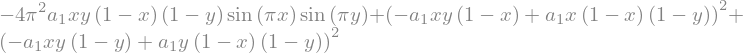

In [8]:
dens_ener1 = (u1.diff(x))**2 + (u1.diff(y))**2 + 2*u1*f
dens_ener1

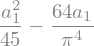

In [9]:
ener1 = integrate(dens_ener1, (x, 0, 1), (y, 0, 1))
ener1

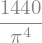

In [10]:
a1_sol = solve(diff(ener1, a1), a1)[0]
a1_sol

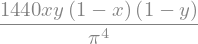

In [11]:
u1_sol = u1.subs(a1, a1_sol)
u1_sol

In [12]:
u3 = x*y*(1 - x)*(1 - y)*(a1 + a2*x**2 + a3*y**2)
u3

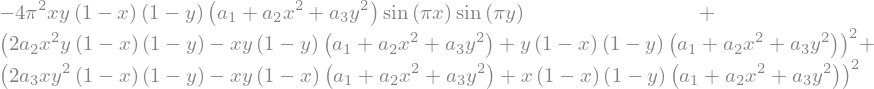

In [13]:
dens_ener3 = (u3.diff(x))**2 + (u3.diff(y))**2 + 2*u3*f
dens_ener3

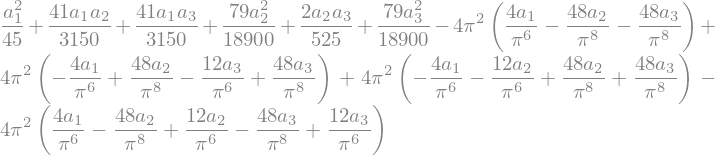

In [14]:
ener3 = integrate(dens_ener3, (x, 0, 1), (y, 0, 1))
ener3

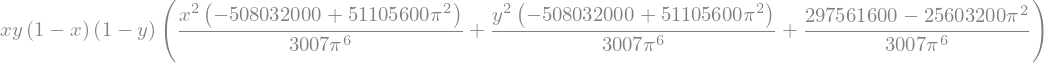

In [15]:
eqs = [diff(ener3, a1),
       diff(ener3, a2),
       diff(ener3, a3)]
a3_sol = solve(eqs, [a1, a2, a3])
u3_sol = u3.subs(a3_sol)
u3_sol

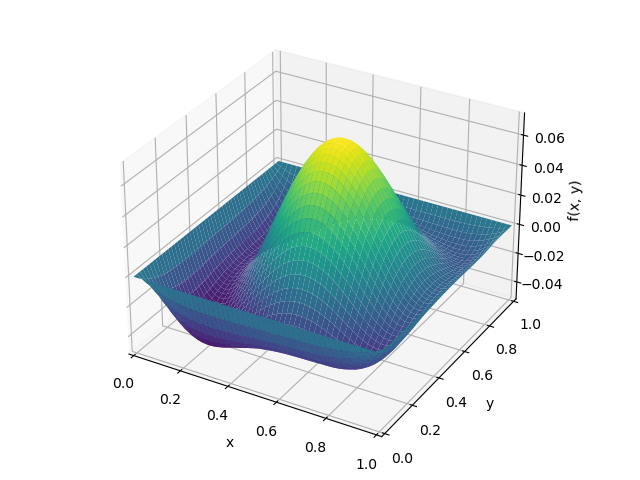

In [16]:
plot3d(u_e - u3_sol, (x, 0, 1), (y, 0, 1))